In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo


ecoli = fetch_ucirepo(id=39)


X = ecoli.data.features
y = ecoli.data.targets


print(ecoli.metadata)


print(ecoli.variables)


{'uci_id': 39, 'name': 'Ecoli', 'repository_url': 'https://archive.ics.uci.edu/dataset/39/ecoli', 'data_url': 'https://archive.ics.uci.edu/static/public/39/data.csv', 'abstract': 'This data contains protein localization sites', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 336, 'num_features': 7, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': ['Sequence'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1996, 'last_updated': 'Thu Feb 15 2024', 'dataset_doi': '10.24432/C5388M', 'creators': ['Kenta Nakai'], 'intro_paper': {'title': 'A Probabilistic Classification System for Predicting the Cellular Localization Sites of Proteins', 'authors': 'P. Horton, K. Nakai', 'published_in': 'Intelligent Systems in Molecular Biology', 'year': 1996, 'url': 'https://www.semanticscholar.org/paper/A-Probabilistic-Classification-System-for-the-Sites-Horton-Nakai/623c5e3441a1

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ecoli = pd.read_csv('https://archive.ics.uci.edu/static/public/39/data.csv')

ecoli.head(10)


,Sequence,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
5,ALKH_ECOLI,0.67,0.39,0.48,0.5,0.36,0.38,0.46,cp
6,AMPD_ECOLI,0.29,0.28,0.48,0.5,0.44,0.23,0.34,cp
7,AMY2_ECOLI,0.21,0.34,0.48,0.5,0.51,0.28,0.39,cp
8,APT_ECOLI,0.20,0.44,0.48,0.5,0.46,0.51,0.57,cp
9,ARAC_ECOLI,0.42,0.40,0.48,0.5,0.56,0.18,0.30,cp


# **DATA SET CHECKING**

In [6]:
ecoli.drop_duplicates()

ecoli.isnull().sum()*100/ecoli.shape[0]

Sequence    0.0
mcg         0.0
gvh         0.0
lip         0.0
chg         0.0
aac         0.0
alm1        0.0
alm2        0.0
class       0.0
dtype: float64

NO NULL VALUE

# **PLOTTING AND HEATMAP**

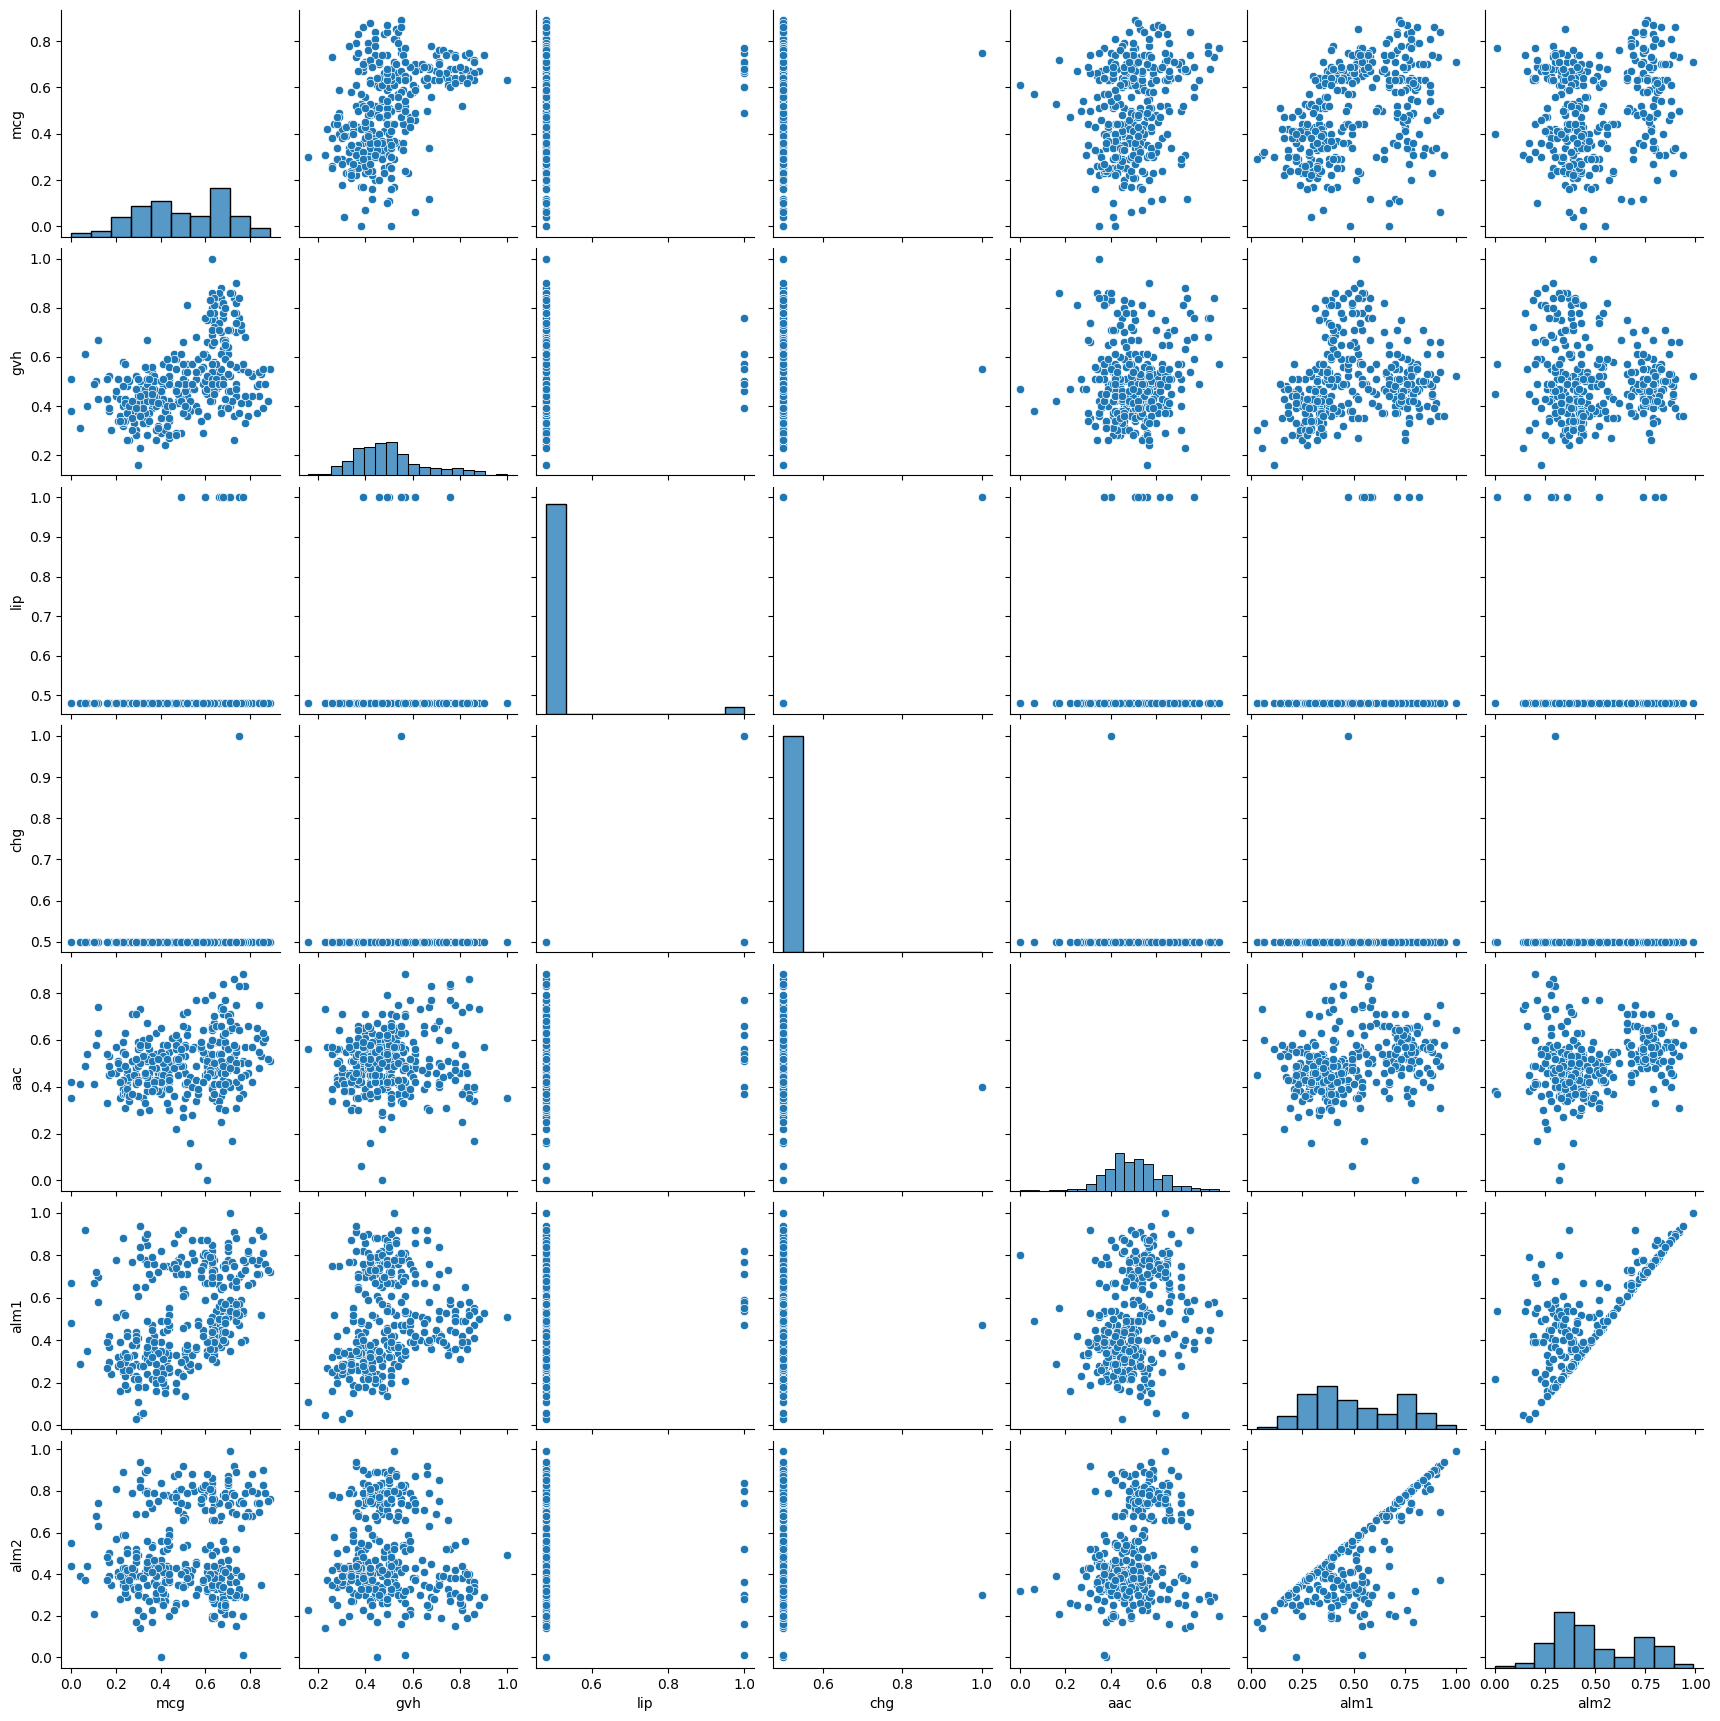

In [9]:
sns.pairplot(ecoli)

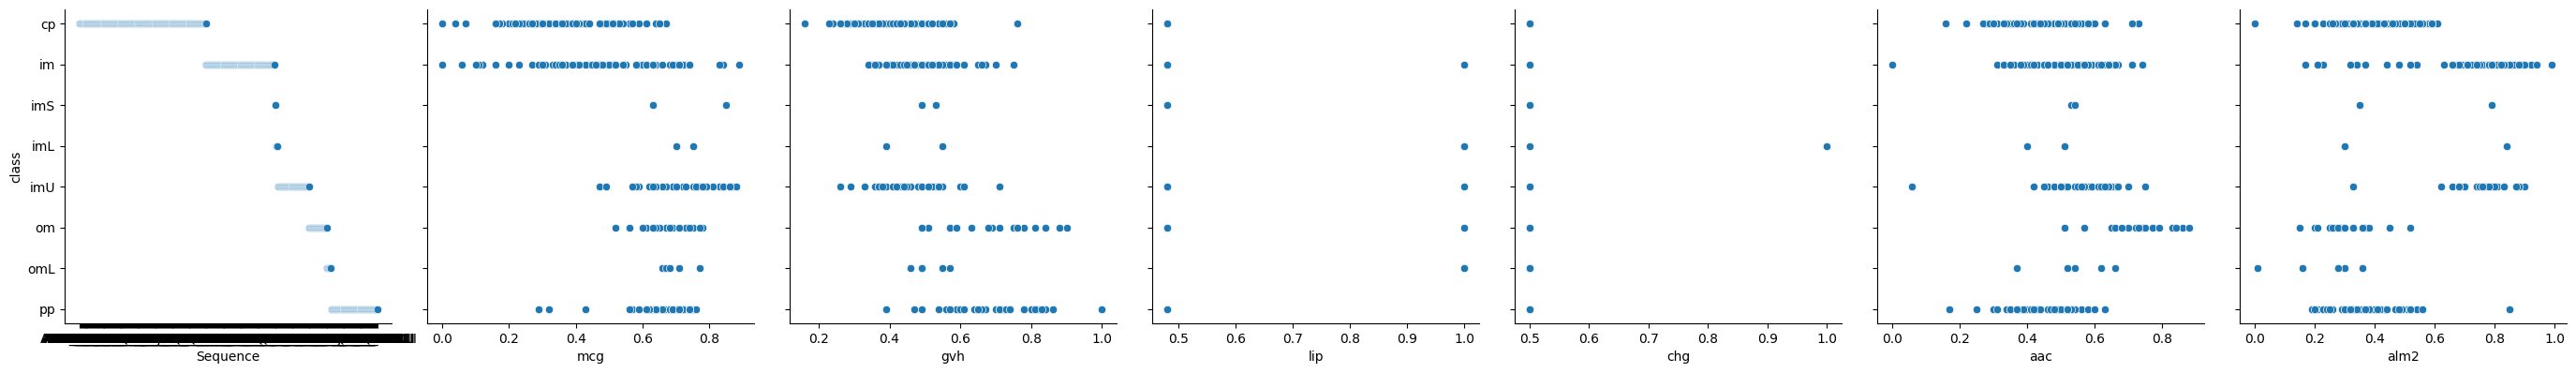

In [10]:
sns.pairplot(ecoli, x_vars=['Sequence', 'mcg', 'gvh', 'lip', 'chg', 'aac', 'alm2'], y_vars='class', height=4, aspect=1, kind='scatter')
plt.show()

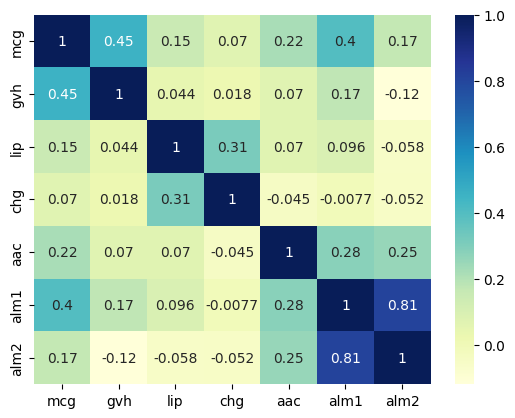

In [11]:
numeric_columns = ecoli.select_dtypes(include='number')

sns.heatmap(numeric_columns.corr(), cmap="YlGnBu", annot=True)
plt.show()

# **DATA SET SPLITTING AND TRAINING**





In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


<ipython-input-36-8edc4bb83147>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# **COMPUTING ROC CURVE AND AUC SCORE**

In [37]:

fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=model.classes_[1])
roc_auc = auc(fpr, tpr)

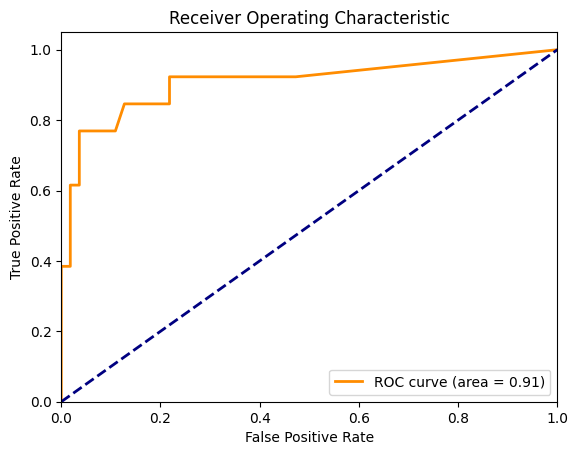

In [38]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# **CONFUSION MATRIX**

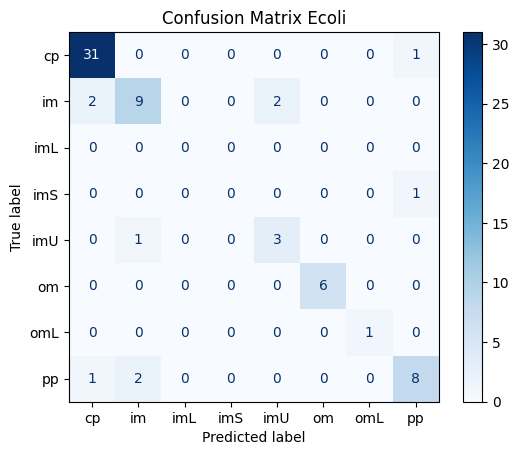

In [40]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix Ecoli')
plt.show()

# **PICKLE FOR MODEL SAVING**

In [ ]:
import pickle

pickle.dump(model, open('/content/model_saved','wb'))

In [ ]:
model_loaded = pickle.load(open('/content/model_saved', 'rb'))

In [ ]:
model_loaded.predict_proba(X_test)

array([[0.99, 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  ],
       [0.9 , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.08],
       [0.01, 0.02, 0.  , 0.  , 0.  , 0.06, 0.  , 0.91],
       [0.99, 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 0.01, 0.  , 0.  , 0.  , 0.61, 0.01, 0.37],
       [0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01],
       [0.  , 0.29, 0.  , 0.  , 0.71, 0.  , 0.  , 0.  ],
       [0.  , 0.01, 0.07, 0.  , 0.01, 0.19, 0.6 , 0.12],
       [0.04, 0.37, 0.  , 0.03, 0.09, 0.03, 0.07, 0.37],
       [0.97, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03],
       [0.01, 0.91, 0.  , 0.  , 0.06, 0.01, 0.01, 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01],
       [0.  , 0.68, 0.01, 0.  , 0.31, 0.  , 0.  , 0.  ],
       [0.  , 0.89, 0.  , 0.  , 0.11, 0.  , 0.  , 0.  ],
       [0.  , 0.8 , 0.  , 0.01,

# **ACCURACY OF THE ENSEMBLE LEARNING MODEL ( RANDOM FOREST )**

In [ ]:

y_pred_rf = model_loaded.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')

Random Forest Accuracy: 0.8529411764705882
